In [265]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

**Baca dataset dari colab**


In [266]:
# from google.colab import drive
# drive.mount("/content/drive/")

# # Load dataset
# dataset = pd.read_csv('/content/drive/MyDrive/Project_Data_Mining/Covid_Dataset.csv')

**Baca dataset dari lokal**


In [267]:
# Load dataset
dataset = pd.read_csv('Covid Dataset.csv')


Melihat Dataset Teratas


In [268]:
dataset.head()


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


Informasi mengenai jumlah dataset


In [269]:
dataset.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [270]:
dataset.dtypes

Breathing Problem                          object
Fever                                      object
Dry Cough                                  object
Sore throat                                object
Running Nose                               object
Asthma                                     object
Chronic Lung Disease                       object
Headache                                   object
Heart Disease                              object
Diabetes                                   object
Hyper Tension                              object
Fatigue                                    object
Gastrointestinal                           object
Abroad travel                              object
Contact with COVID Patient                 object
Attended Large Gathering                   object
Visited Public Exposed Places              object
Family working in Public Exposed Places    object
Wearing Masks                              object
Sanitization from Market                   object


In [271]:
X = dataset[dataset.columns.drop('COVID-19')]
y = dataset['COVID-19']

X

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No


Pre Processing data


In [272]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
# Preprocessing data

X = dataset[dataset.columns.drop('COVID-19')]
y = dataset['COVID-19']

boolean_cols = X.select_dtypes(include='object').columns


# Melakukan one-hot encoding pada kolom boolean
encoder = OneHotEncoder(drop='if_binary', sparse=False, dtype=np.int64)
X_encoded = pd.DataFrame(encoder.fit_transform(X[boolean_cols]), columns=boolean_cols)

# Menyatukan kembali data yang telah di-encode dengan data lainnya
X = pd.concat([X.drop(boolean_cols, axis=1), X_encoded], axis=1)

X
# le = LabelEncoder()
# y = le.fit_transform(y)


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,1,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,1
5430,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1,1
5431,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
5432,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1


**_Analisis Akurasi Berbagai Algoritma Naive Bayes_**


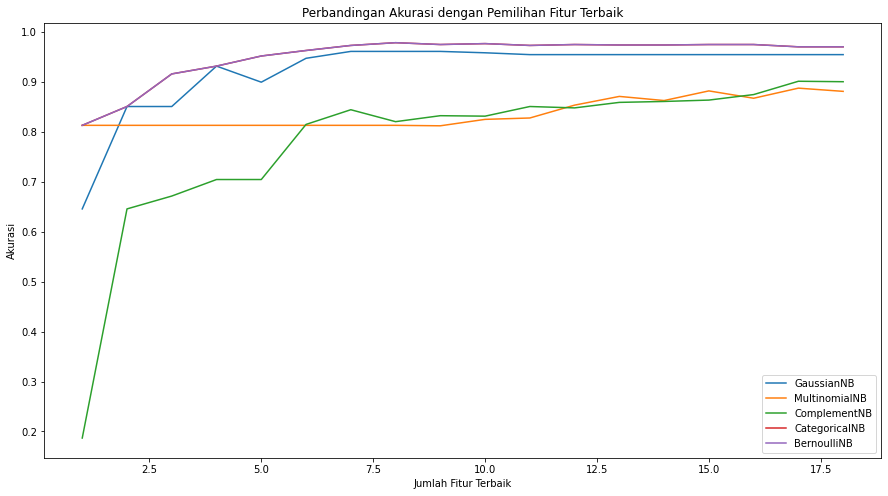

Indeks Gaussian Acc dengan Nilai Maksimal: 6
Indeks Multinomial Acc dengan Nilai Maksimal: 16
Indeks Complement Acc dengan Nilai Maksimal: 16
Indeks Categorical Acc dengan Nilai Maksimal: 7
Indeks Bernoulli Acc dengan Nilai Maksimal: 7
Rata Indeks Maksimal: 10.4


In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Inisialisasi jumlah fitur terbaik yang akan diuji
k_values = range(1, 19)  # Coba dari 1 hingga 10 fitur terbaik

# Inisialisasi list untuk menyimpan akurasi dari masing-masing algoritma
gaussian_acc = []
multinomial_acc = []
complement_acc = []
categorical_acc = []
bernoulli_acc = []

# Melakukan seleksi fitur dan pengujian pada masing-masing algoritma
for k in k_values:
    # Menggunakan SelectKBest untuk memilih k fitur terbaik menggunakan metode chi2
    skb = SelectKBest(chi2, k=k)
    X_selected = skb.fit_transform(X, y)

    # Membagi data menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=42)

    # Membangun model Gaussian Naive Bayes
    gaussian_model = GaussianNB(var_smoothing = 0.01)
    gaussian_model.fit(X_train, y_train)
    y_pred_gaussian = gaussian_model.predict(X_test)
    gaussian_accuracy = accuracy_score(y_test, y_pred_gaussian)
    gaussian_acc.append(gaussian_accuracy)

    # Membangun model Multinomial Naive Bayes
    multinomial_model = MultinomialNB(alpha=0.1)
    multinomial_model.fit(X_train, y_train)
    y_pred_multinomial = multinomial_model.predict(X_test)
    multinomial_accuracy = accuracy_score(y_test, y_pred_multinomial)
    multinomial_acc.append(multinomial_accuracy)

    # Membangun model Complement Naive Bayes
    complement_model = ComplementNB(alpha=0.1)
    complement_model.fit(X_train, y_train)
    y_pred_complement = complement_model.predict(X_test)
    complement_accuracy = accuracy_score(y_test, y_pred_complement)
    complement_acc.append(complement_accuracy)

    # Membangun model Categorical Naive Bayes
    categorical_model = CategoricalNB(alpha=0.001)
    categorical_model.fit(X_train, y_train)
    y_pred_categorical = categorical_model.predict(X_test)
    categorical_accuracy = accuracy_score(y_test, y_pred_categorical)
    categorical_acc.append(categorical_accuracy)

    # Membangun model Bernoulli Naive Bayes
    bernoulli_model = BernoulliNB(alpha=0.001)
    bernoulli_model.fit(X_train, y_train)
    y_pred_bernoulli = bernoulli_model.predict(X_test)
    bernoulli_accuracy = accuracy_score(y_test, y_pred_bernoulli)
    bernoulli_acc.append(bernoulli_accuracy)

# Plotting hasil perbandingan akurasi
plt.figure(figsize=(15, 8))
plt.plot(k_values, gaussian_acc, label='GaussianNB')
plt.plot(k_values, multinomial_acc, label='MultinomialNB')
plt.plot(k_values, complement_acc, label='ComplementNB')
plt.plot(k_values, categorical_acc, label='CategoricalNB')
plt.plot(k_values, bernoulli_acc, label='BernoulliNB')
plt.xlabel('Jumlah Fitur Terbaik')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi dengan Pemilihan Fitur Terbaik')
plt.legend()
plt.show()
# Mencari indeks nilai maksimum
max_gaussian_index = gaussian_acc.index(max(gaussian_acc))
max_multinomial_index = multinomial_acc.index(max(multinomial_acc))
max_complement_index = complement_acc.index(max(complement_acc))
max_categorical_index = categorical_acc.index(max(categorical_acc))
max_bernoulli_index = bernoulli_acc.index(max(bernoulli_acc))

# Menampilkan hasil
print("Indeks Gaussian Acc dengan Nilai Maksimal:", max_gaussian_index)
print("Indeks Multinomial Acc dengan Nilai Maksimal:", max_multinomial_index)
print("Indeks Complement Acc dengan Nilai Maksimal:", max_complement_index)
print("Indeks Categorical Acc dengan Nilai Maksimal:", max_categorical_index)
print("Indeks Bernoulli Acc dengan Nilai Maksimal:", max_bernoulli_index)
print("Rata Indeks Maksimal:", (max_gaussian_index + max_multinomial_index + max_complement_index + max_categorical_index + max_bernoulli_index)/5)


***Pemilihan Fitur Tebaik***

In [274]:
skb = SelectKBest(chi2, k=8)
X_selected = skb.fit_transform(X, y)

***Fitur Terbaik Yang dipilih***

In [275]:
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
names = X.columns.values[skb.get_support()]
scores = skb.scores_[skb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Nama Fitur', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Nama Fitur'], ascending = [False, True])
cols_idxs = skb.get_support(indices=True)
# features_df_new = X.iloc[:,cols_idxs]
ns_df_sorted


,Nama Fitur,F_Scores
4,Abroad travel,587.725530
6,Attended Large Gathering,445.070586
3,Sore throat,374.479605
0,Breathing Problem,357.224357
5,Contact with COVID Patient,345.368317
2,Dry Cough,242.944097
1,Fever,144.581349
7,Family working in Public Exposed Places,81.414100


***Algoritma Naive Bayes***

1. Rumus Naive Bayes Native

    $$P(C_k|X) = \frac{P(C_k)}{P(X|C_k)} \times P(X)$$

Rumus di atas menggambarkan perhitungan probabilitas kelas $C_k$ terhadap data $X$ dalam Naive Bayes Native. $P(C_k|X)$ adalah probabilitas kelas $C_k$ pada data $X$, $P(C_k)$
adalah probabilitas prior kelas $C_k$, $P(X|C_k)$ adalah probabilitas likelihood data $X$ pada kelas $C_k$, dan $P(X)$ adalah probabilitas data $X$.

2. Rumus Naive Bayes dengan Laplace Smoothing

    $$P(C_k|X) = \frac{P(C_k) + 1}{P(X|C_k) + |X|} \times P(X)$$

Rumus di atas adalah rumus Naive Bayes dengan Laplace Smoothing. Selain menggunakan probabilitas prior $P(C_k)$, probabilitas likelihood $P(X|C_k)$, dan probabilitas data $P(X)$, rumus ini juga menambahkan faktor smoothing dengan menambahkan nilai 1 pada probabilitas prior dan probabilitas likelihood, serta menambahkan $|X|$ (jumlah fitur pada data $X$) pada penyebut probabilitas likelihood. Hal ini dilakukan untuk menghindari masalah pembagian dengan nol dan memberikan pengaruh kecil dari fitur yang tidak ada pada data.

***Multinomial Naive Bayes***

In [276]:
# Membangun model Multinomial Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)
multinomial_model = MultinomialNB()
multinomial_model.fit(X_train, y_train)
y_pred_multinomial = multinomial_model.predict(X_test)
multinomial_accuracy = accuracy_score(y_test, y_pred_multinomial)

accuracy = accuracy_score(y_test, y_pred_multinomial)
print("Akurasi:", accuracy)

scores = cross_val_score(multinomial_model, X_selected, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Akurasi: 0.8132474701011959
Cross-Validation Scores: [0.80680773 0.80680773 0.80680773 0.80588776 0.80662983]
Mean Accuracy: 0.8065881563632482
Standard Deviation: 0.0003569090997113163


***Complement Naive Bayes***

In [277]:
# Membangun model Complement Naive Bayes
complement_model = ComplementNB(alpha=0.1)
complement_model.fit(X_train, y_train)
y_pred_complement = complement_model.predict(X_test)
complement_accuracy = accuracy_score(y_test, y_pred_complement)
print("Akurasi:", complement_accuracy)

scores = cross_val_score(complement_model, X_selected, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Akurasi: 0.8206071757129715
Cross-Validation Scores: [0.8049678  0.76172953 0.65225391 0.74701012 0.88489871]
Mean Accuracy: 0.7701720144822201
Standard Deviation: 0.07600709170754073


***Categorical Naive Bayes***

In [278]:
from sklearn.naive_bayes import CategoricalNB, BernoulliNB
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)


# categorical_model = CategoricalNB()
categorical_model = CategoricalNB(alpha=0.001)

categorical_model.fit(X_train, y_train)
y_pred_categorical = categorical_model.predict(X_test)
categorical_accuracy = accuracy_score(y_test, y_pred_categorical)

accuracy = accuracy_score(y_test, y_pred_categorical)
print("Akurasi:", accuracy)

scores = cross_val_score(categorical_model, X_selected, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


Akurasi: 0.9788408463661453
Cross-Validation Scores: [0.93100276 1.         0.92916283 0.90800368 0.92541436]
Mean Accuracy: 0.9387167275739909
Standard Deviation: 0.0317069892258348


In [279]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train, y_train)
y_pred_bernoulli = bernoulli_model.predict(X_test)
bernoulli_accuracy = accuracy_score(y_test, y_pred_bernoulli)

accuracy = accuracy_score(y_test, y_pred_bernoulli)
print("Akurasi:", accuracy)

scores = cross_val_score(bernoulli_model, X_selected, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


Akurasi: 0.9788408463661453
Cross-Validation Scores: [0.93100276 1.         0.92916283 0.90800368 0.92541436]
Mean Accuracy: 0.9387167275739909
Standard Deviation: 0.0317069892258348


**_Gaussian NB tanpa var_smoothing_**


In [280]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

gaussian_model = GaussianNB()

gaussian_model.fit(X_train, y_train)
y_pred = gaussian_model.predict(X_test)
gaussian_accuracy = accuracy_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

scores = cross_val_score(gaussian_model, X_selected, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


Akurasi: 0.7828886844526219
Cross-Validation Scores: [0.81048758 0.78932843 0.65961362 0.58785649 0.86832413]
Mean Accuracy: 0.7431220467571721
Standard Deviation: 0.10337287621881516


**_Gaussian NB dengan var_smoothing_**


In [281]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

gaussian_model = GaussianNB(var_smoothing=0.1)

gaussian_model.fit(X_train, y_train)
y_pred = gaussian_model.predict(X_test)
gaussian_accuracy = accuracy_score(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

scores = cross_val_score(gaussian_model, X_selected, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


Akurasi: 0.9650413983440662
Cross-Validation Scores: [0.90524379 1.         0.89696412 0.84268629 0.93278085]
Mean Accuracy: 0.9155350102754637
Standard Deviation: 0.051360444263987774


**_Perbandingan Separasi Data dengan Akurasinya antar algortima_**


In [290]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Daftar algoritma yang akan diuji
algorithms = {
    'Gaussian NB': GaussianNB(),
    'GNB smoothing': GaussianNB(var_smoothing=0.1),
    'Multinomial NB' : MultinomialNB(alpha=0, force_alpha=True),
    'MNB smoothing' : MultinomialNB(alpha=1),
    'Complement NB' : ComplementNB(alpha=0, force_alpha=True),
    'CPNB smoothing' : ComplementNB(alpha=1),
    'Categorical NB' : CategoricalNB(alpha=0, force_alpha=True),
    'CTNB smoothing': CategoricalNB(alpha=1),
    'Bernoulli NB' : BernoulliNB(alpha=0, force_alpha=True),
    'BNB smoothing': BernoulliNB(alpha=1),
}

# Daftar proporsi pemisahan data yang akan diuji
test_size = 0.2
train_sizes = [i*0.1 for i in range(1 , 11 - int(test_size*10))]


# Inisialisasi dictionary untuk menyimpan akurasi masing-masing algoritma
accuracy_scores = {algorithm: [] for algorithm in algorithms}

# Lakukan pemisahan data dan evaluasi untuk setiap proporsi
for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, train_size=train_size, test_size=test_size, random_state=42)

    for algorithm_name, algorithm in algorithms.items():
        algorithm.fit(X_train, y_train)
        y_pred = algorithm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[algorithm_name].append(accuracy)

# Gambar grafik hasil perbandingan akurasi
plt.figure(figsize=(10, 6))

for algorithm_name, accuracies in accuracy_scores.items():
    plt.plot(train_sizes, accuracies, label=algorithm_name)

plt.title('Perbandingan Akurasi Algoritma pada Proporsi Data Training yang Berbeda dengan Data Testing yang sama')
plt.xlabel('Proporsi Data Training')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)
plt.show()


TypeError: __init__() got an unexpected keyword argument 'force_alpha'

***Rata-rata Akurasi Algoritma***

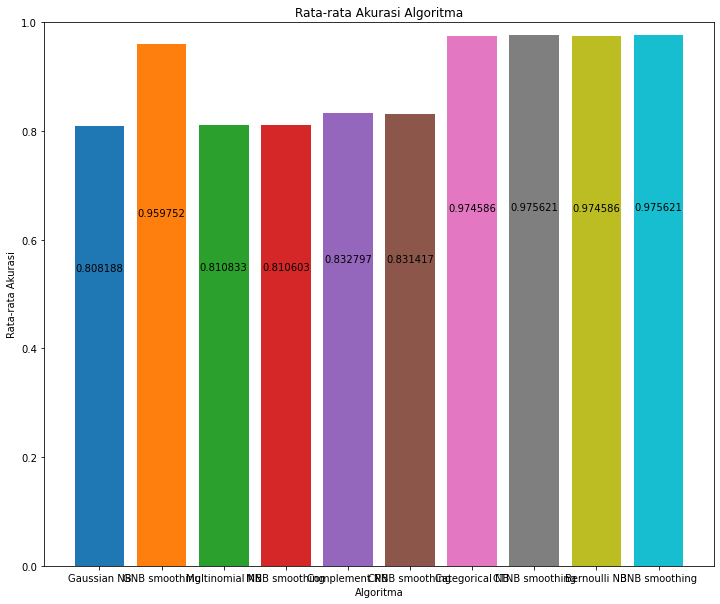

In [286]:
# Menghitung rata-rata akurasi tiap algoritma
average_scores = {algorithm: np.mean(scores)
                  for algorithm, scores in accuracy_scores.items()}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# Plot grafik rata-rata akurasi
plt.figure(figsize=(12, 10))
plt.bar(average_scores.keys(), average_scores.values(), color=colors)
plt.title('Rata-rata Akurasi Algoritma')
plt.xlabel('Algoritma')
plt.ylabel('Rata-rata Akurasi')
plt.ylim(0, 1)
for i, j in enumerate(average_scores.values()):
    plt.text(i, j/1.5, str(round(j, 6)), ha='center', va='bottom')
# plt.grid(True)
plt.show()


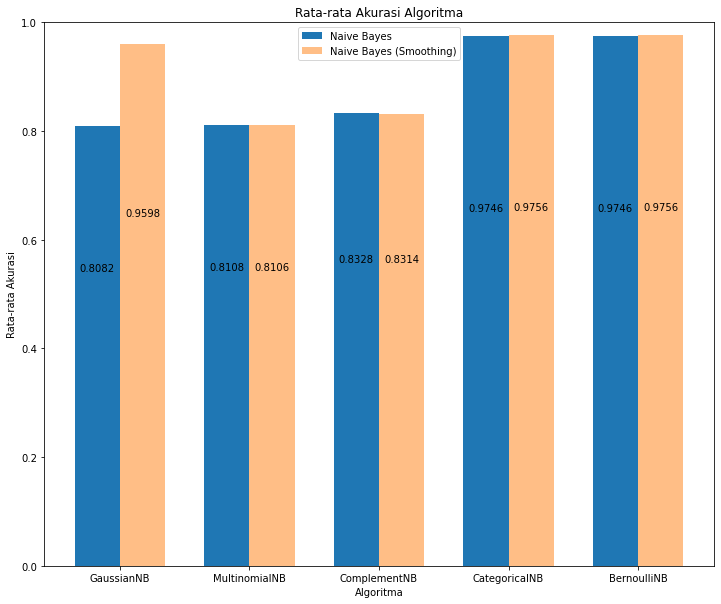

In [289]:
# Menghitung rata-rata akurasi tiap algoritma
average_scores = {algorithm: np.mean(scores)
                  for algorithm, scores in accuracy_scores.items()}
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
#           '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
algorithms = list(average_scores.keys())

# Plot grafik rata-rata akurasi
plt.figure(figsize=(12, 10))
bar_width = 0.35  # Lebar setiap batang

# Menghitung rata-rata akurasi Naive Bayes tanpa smoothing
without_smoothing = [average_scores[algorithm] for algorithm in algorithms if 'smoothing' not in algorithm]

# Menghitung rata-rata akurasi Naive Bayes dengan smoothing
with_smoothing = [average_scores[algorithm] for algorithm in algorithms if 'smoothing' in algorithm]

# Menghasilkan indeks untuk sumbu x
x_indexes = np.arange(len(algorithms)/2)

# Menggambar batang pertama (tanpa smoothing)
plt.bar(x_indexes - bar_width/2, without_smoothing, width=bar_width, label='Naive Bayes')

# Menggambar batang kedua (dengan smoothing)
plt.bar(x_indexes + bar_width/2, with_smoothing, width=bar_width, alpha=0.5, label='Naive Bayes (Smoothing)')

plt.title('Rata-rata Akurasi Algoritma')
plt.xlabel('Algoritma')
plt.ylabel('Rata-rata Akurasi')
plt.ylim(0, 1)

# Menambahkan label nilai rata-rata pada batang pertama (tanpa smoothing)
for i, j in zip(x_indexes, without_smoothing):
    plt.text(i - bar_width/2, j/1.5, str(round(j, 4)), ha='center', va='bottom')

# Menambahkan label nilai rata-rata pada batang kedua (dengan smoothing)
for i, j in zip(x_indexes, with_smoothing):
    plt.text(i + bar_width/2, j/1.5, str(round(j, 4)), ha='center', va='bottom')

plt.xticks(x_indexes, ['GaussianNB', 'MultinomialNB', 'ComplementNB','CategoricalNB','BernoulliNB'])  # Mengatur label pada sumbu x
plt.legend()  # Menampilkan legenda
plt.show()